# Recursive multi-step forecasting with exogenous variables


In [2]:
import pandas as pd
import functions


import pandas as pd
import warnings
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg

from sklearn.linear_model import Ridge, Lasso

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Most Restricted Forecasting for start of COVID-19 pandemic 

## with Exoginous Variables 


 Forecast for most_restricted and depression untill 2021-01-01 

Test error (mse): 28.13149827875157 

Feature Importances
                feature  importance
0                 lag_1    0.464925
1                 lag_2    0.104279
2                 lag_3    0.157572
3                 lag_4   -0.004887
4                 lag_5    0.106637
5                 lag_6   -0.152516
6                 lag_7    0.011334
7                 lag_8    0.060582
8                 lag_9    0.052687
9                lag_10   -0.096738
10               lag_11    0.042666
11               lag_12   -0.057297
12               lag_13   -0.061813
13               lag_14   -0.065407
14               lag_15    0.067735
15         stay_at_home    0.265771
16         mask_mandate   -2.902515
17    gatherings_banned    0.410852
18    business_closures    0.410852
19  travel_restrictions   -0.530348

 Forecast for most_restricted and anxiety untill 2021-01-01 

Test error (mse): 25.1837627273116 

Feature Importances


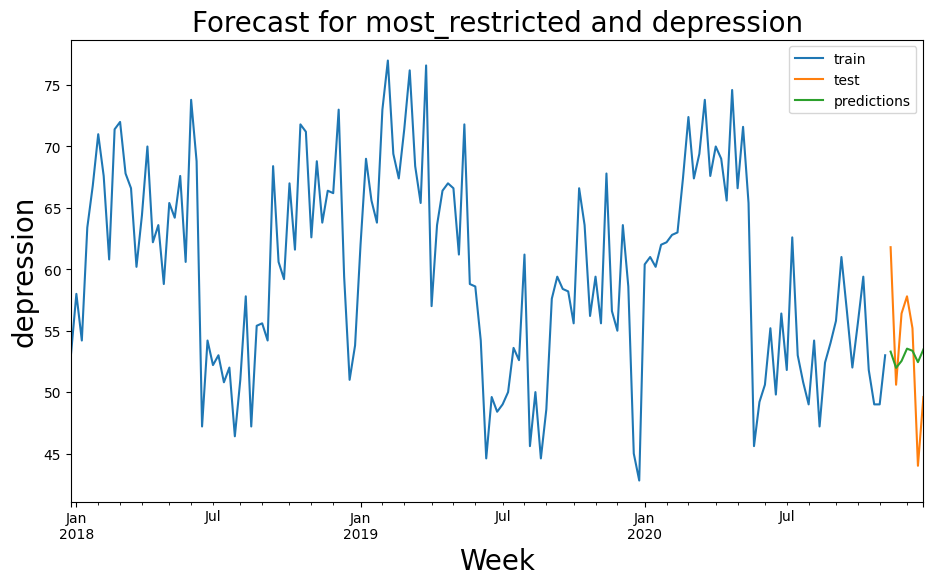

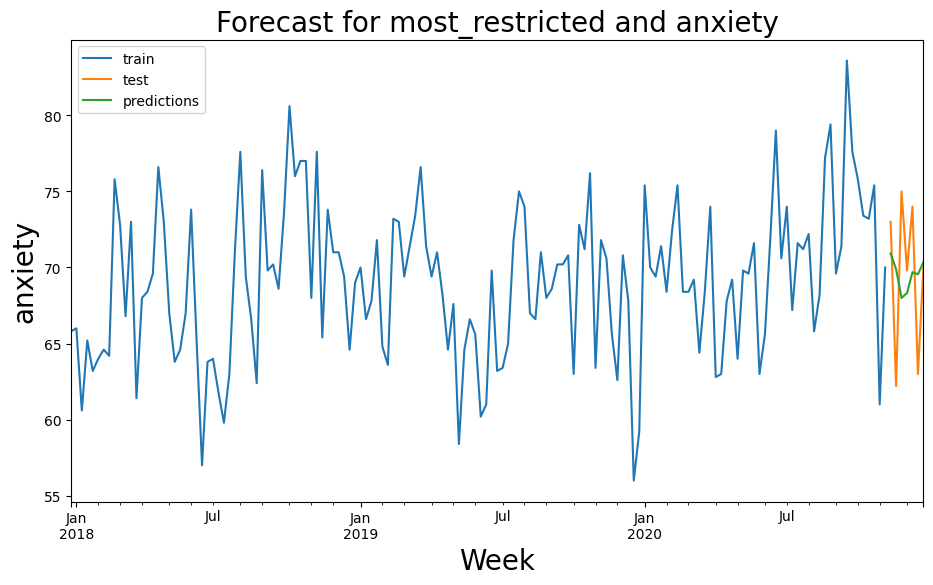

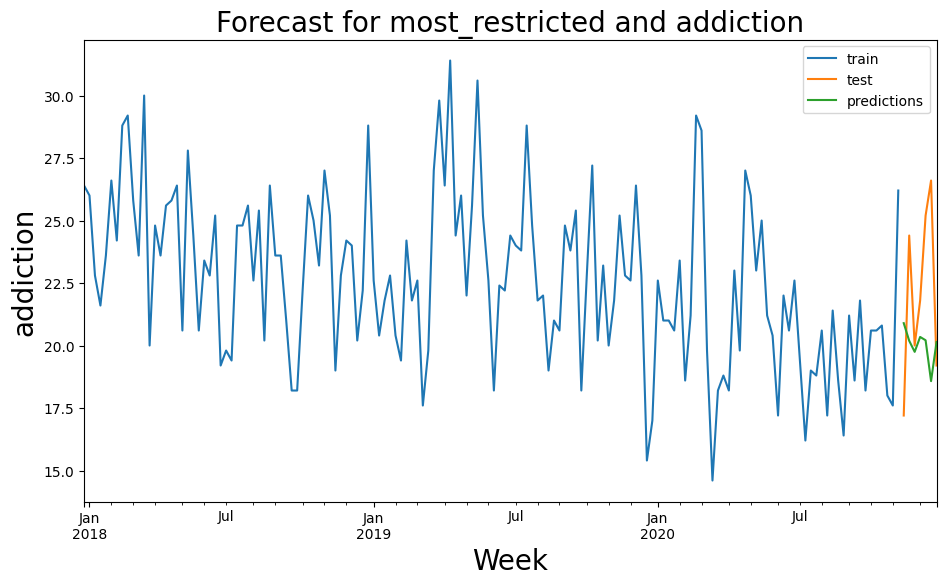

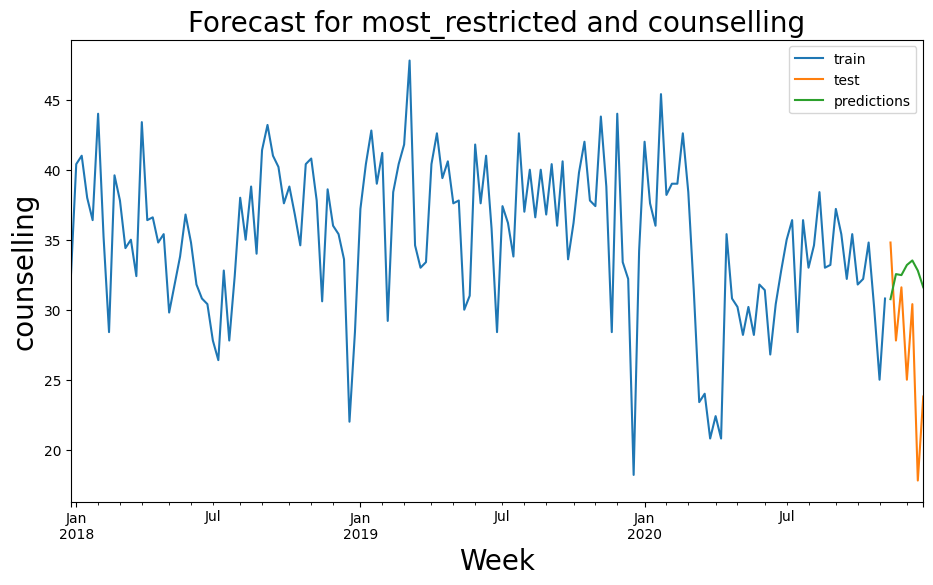

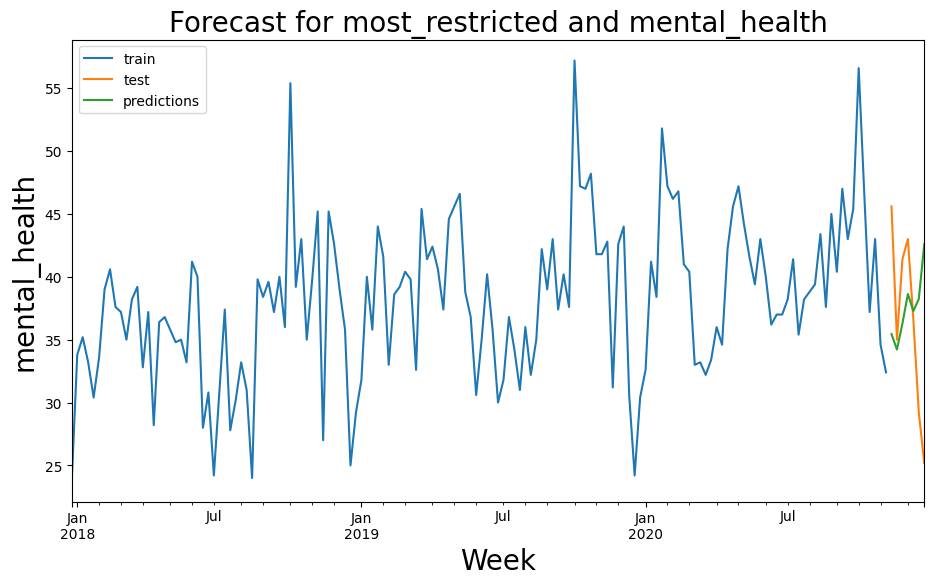

In [3]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
feature_imp_most = pd.DataFrame()
for search in searches_list:
        forecast = functions.forecast_file_search(file='most_restricted', period='2021-01-01', steps=7, search=search, regressor=Ridge(), lags=15)
        
        if feature_imp_most.empty:
            feature_imp_most = forecast.get_feature_importance()
            feature_imp_most.rename(columns={'importance': search}, inplace=True)
        else:
            feature_imp_most = feature_imp_most.merge(forecast.get_feature_importance(), on = 'feature', how='left')
            feature_imp_most.rename(columns={'importance': search}, inplace=True)

In [5]:
# Get feature importanses only fot COVID-19 restrictions
feature_imp_most = feature_imp_most.loc[15:19]

## without Exoginous Variables 


 Forecast for most_restricted and depression untill 2021-01-01 

Test error (mse): 42.481346061126146 

Feature Importances
   feature  importance
0    lag_1    0.481138
1    lag_2    0.110948
2    lag_3    0.163504
3    lag_4    0.000043
4    lag_5    0.114341
5    lag_6   -0.148834
6    lag_7    0.012917
7    lag_8    0.061231
8    lag_9    0.054074
9   lag_10   -0.093956
10  lag_11    0.046327
11  lag_12   -0.056199
12  lag_13   -0.063425
13  lag_14   -0.065853
14  lag_15    0.065624

 Forecast for most_restricted and anxiety untill 2021-01-01 

Test error (mse): 29.66992230104415 

Feature Importances
   feature  importance
0    lag_1    0.328929
1    lag_2   -0.048709
2    lag_3    0.108999
3    lag_4    0.219655
4    lag_5    0.038908
5    lag_6   -0.071771
6    lag_7   -0.039778
7    lag_8    0.010776
8    lag_9   -0.083808
9   lag_10   -0.013129
10  lag_11   -0.106381
11  lag_12    0.040861
12  lag_13   -0.094215
13  lag_14    0.134222
14  lag_15   -0.071328

 Forecast for mos

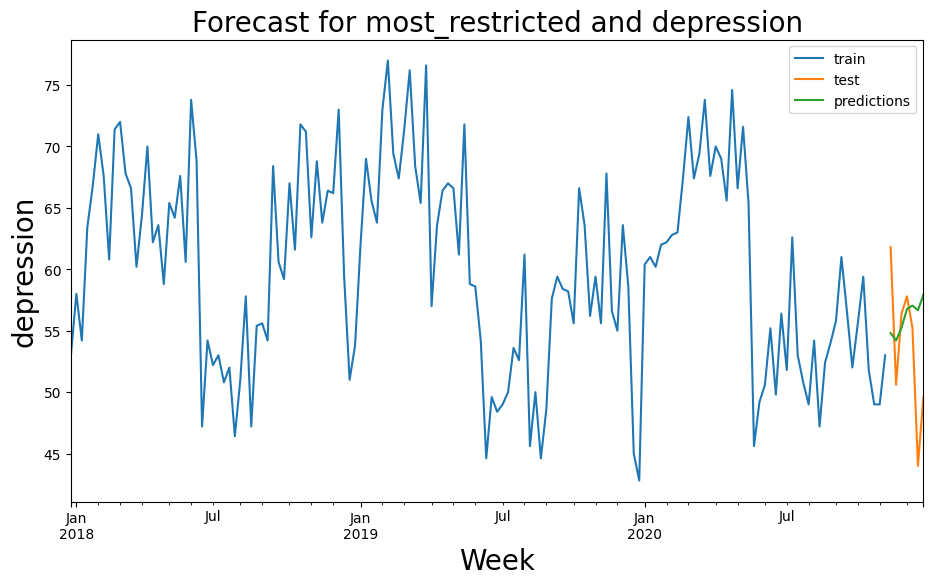

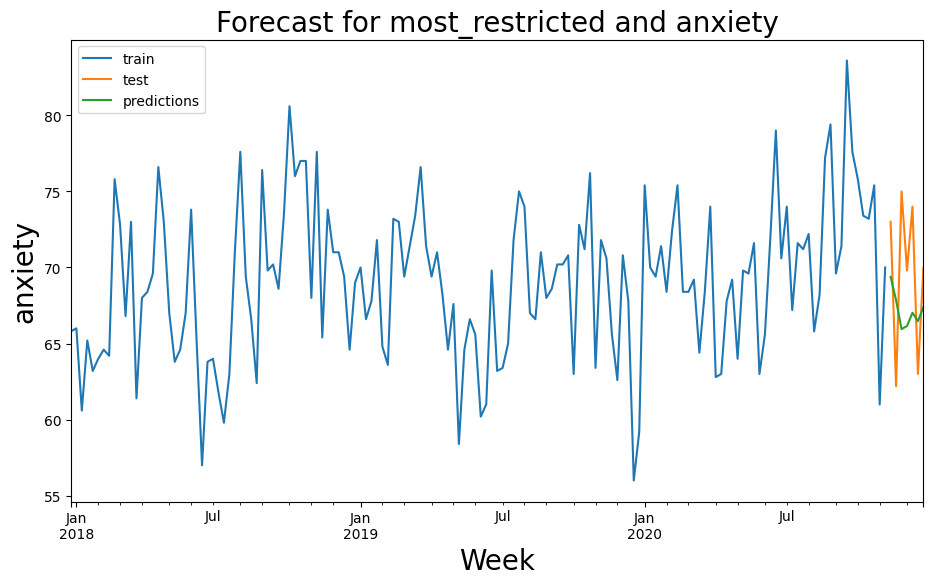

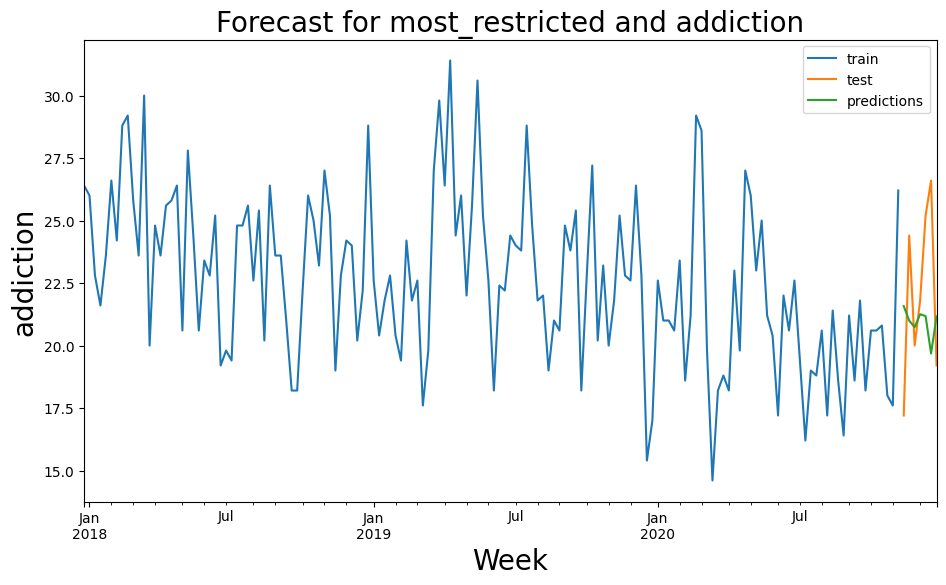

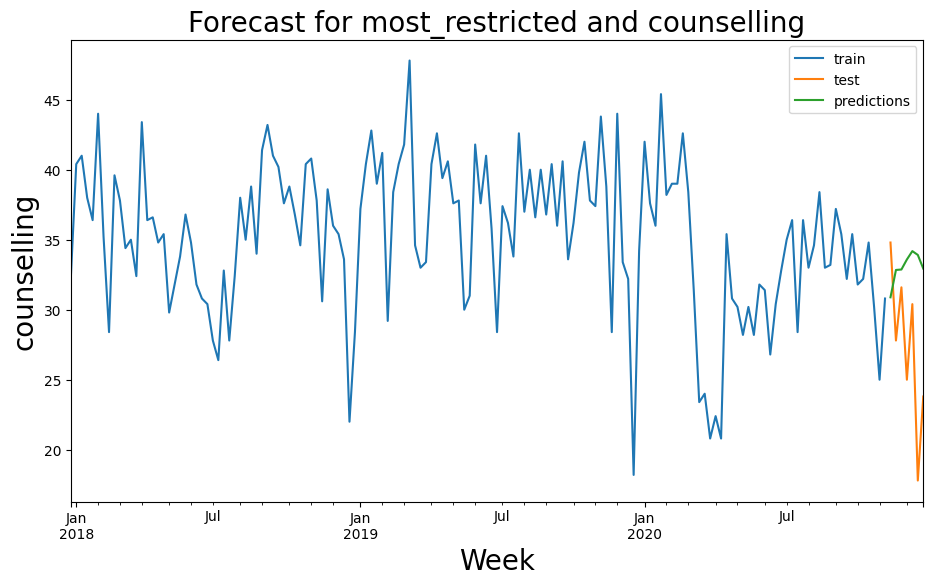

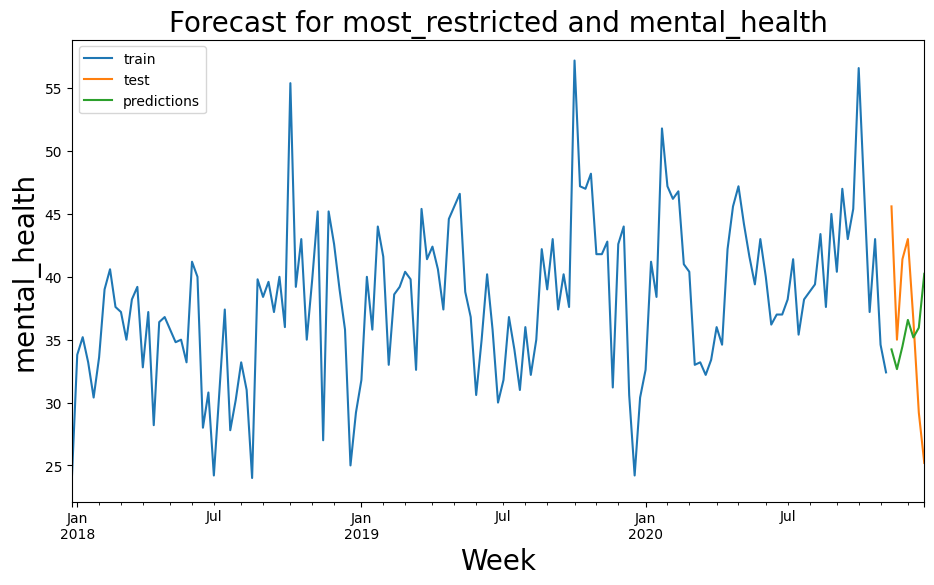

In [6]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
for search in searches_list:
        functions.forecast_file_search_without_exogin(file='most_restricted', period='2021-01-01', steps=7, search=search, regressor=Ridge(), lags=15)

# Least Restricted Forecastingfor start of COVID-19 pandemic 

##  with Exoginous Variables 


 Forecast for least_restricted and depression untill 2021-01-01 

Test error (mse): 92.41777500292798 

Feature Importances
                feature  importance
0                 lag_1    0.460797
1                 lag_2    0.007698
2                 lag_3    0.211162
3                 lag_4   -0.008345
4                 lag_5    0.140325
5                 lag_6   -0.166135
6                 lag_7    0.028005
7                 lag_8   -0.067803
8                 lag_9    0.031109
9                lag_10    0.012736
10               lag_11    0.037181
11               lag_12    0.030971
12               lag_13   -0.111208
13               lag_14   -0.039739
14               lag_15   -0.081933
15         stay_at_home    2.289493
16         mask_mandate   -3.233307
17    gatherings_banned   -0.897321
18    business_closures   -2.281510
19  travel_restrictions    1.203252

 Forecast for least_restricted and anxiety untill 2021-01-01 

Test error (mse): 32.205456507827556 

Feature Importan

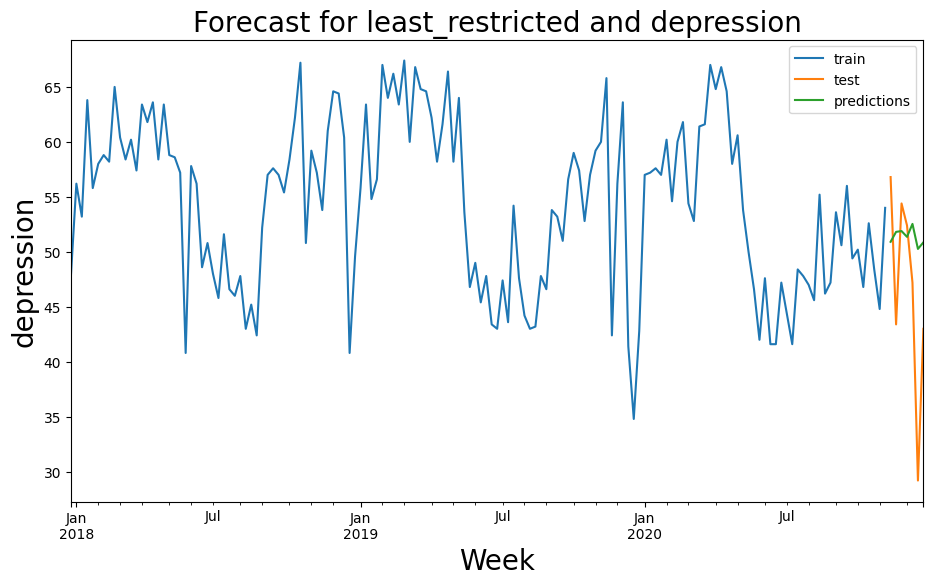

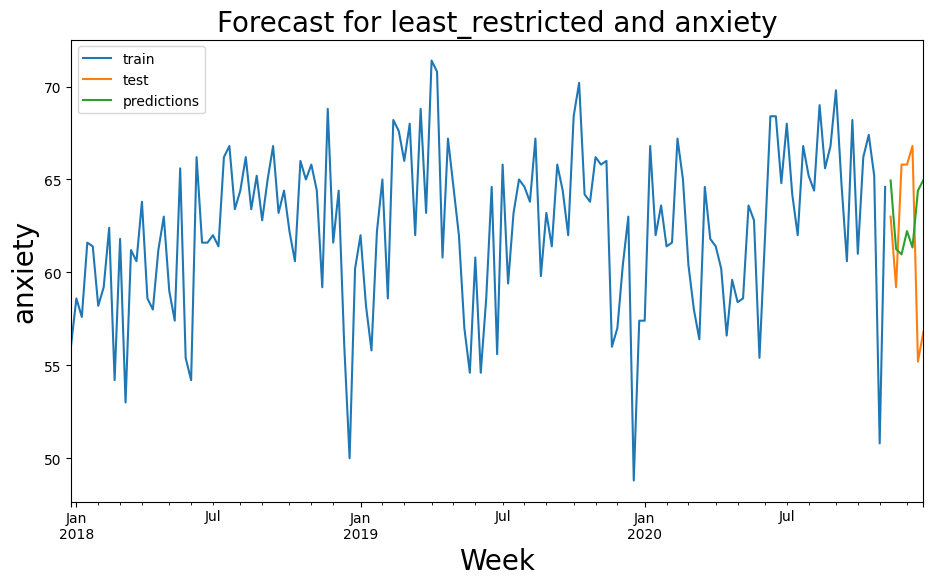

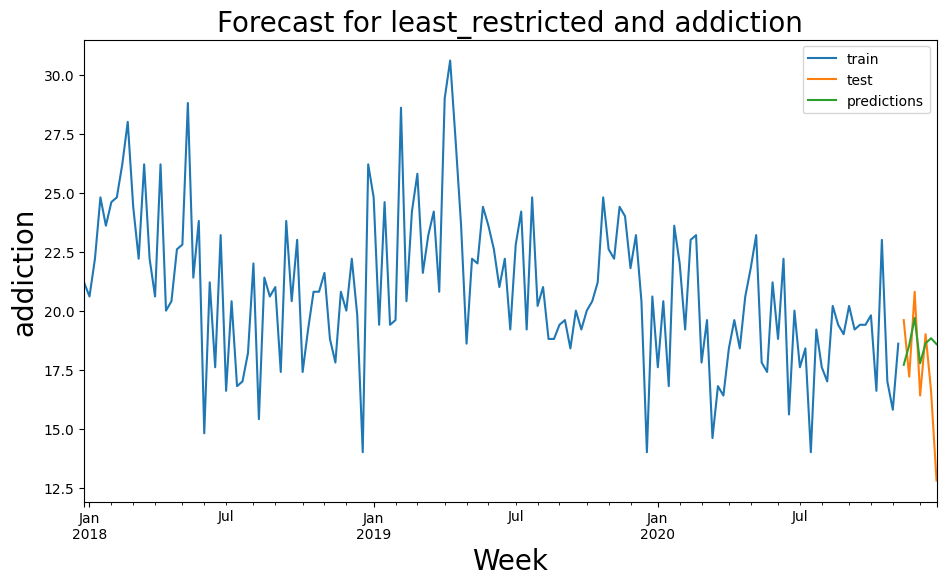

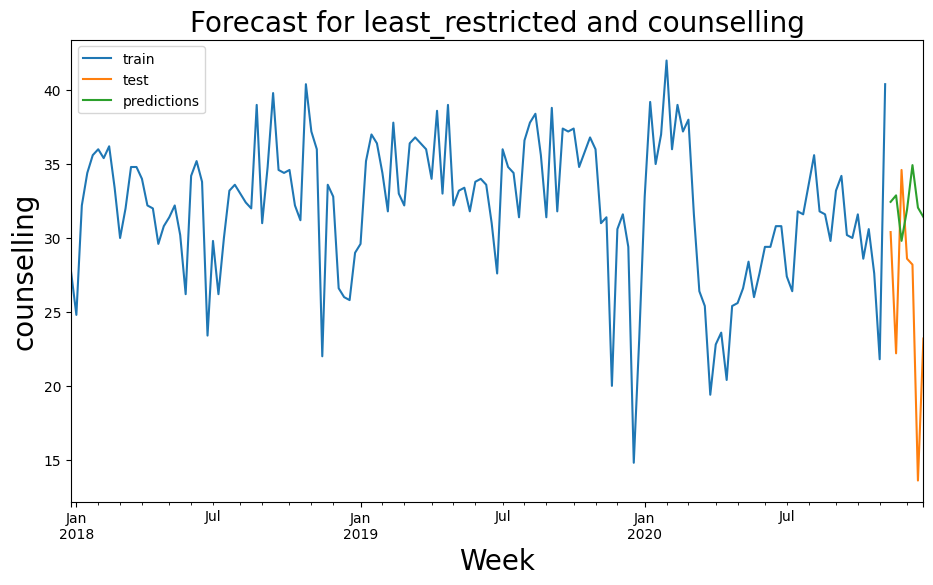

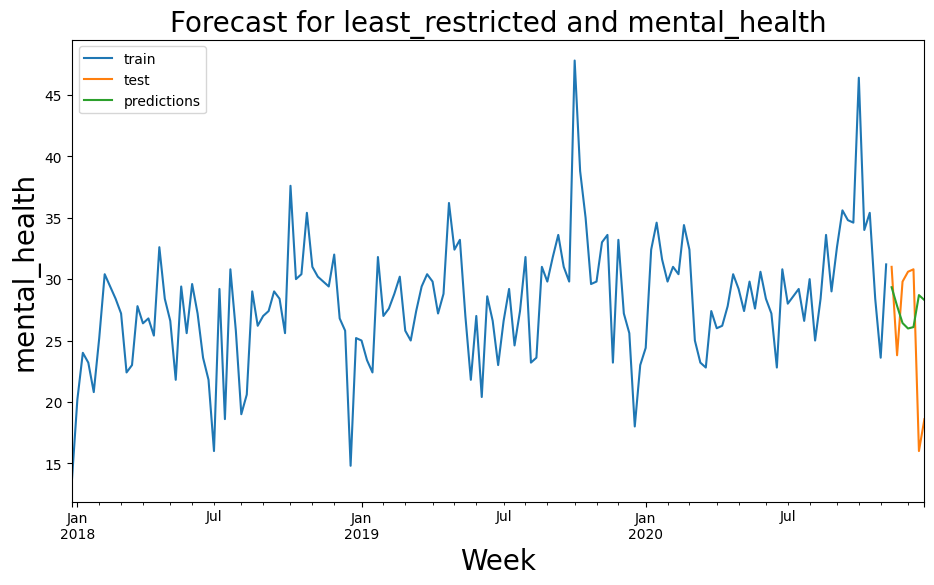

In [7]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
feature_imp_least = pd.DataFrame()
for search in searches_list:
        forecast = functions.forecast_file_search(file='least_restricted', period='2021-01-01', steps=7, search=search, regressor=Ridge(), lags=15)
        
        if feature_imp_least.empty:
            feature_imp_least = forecast.get_feature_importance()
            feature_imp_least.rename(columns={'importance': search}, inplace=True)
        else:
            feature_imp_least = feature_imp_least.merge(forecast.get_feature_importance(), on = 'feature', how='left')
            feature_imp_least.rename(columns={'importance': search}, inplace=True)

In [9]:
# Get feature importanses only fot COVID-19 restrictions
feature_imp_least = feature_imp_least.iloc[15:]

## without Exoginous Variables 


 Forecast for least_restricted and depression untill 2021-01-01 

Test error (mse): 141.2550485644197 


 Forecast for least_restricted and anxiety untill 2021-01-01 

Test error (mse): 28.721583402270884 

Feature Importances
   feature  importance
0    lag_1    0.179092
1    lag_2    0.049106
2    lag_3    0.231026
3    lag_4    0.137985
4    lag_5    0.118129
5    lag_6   -0.054670
6    lag_7   -0.147846
7    lag_8   -0.138517
8    lag_9   -0.134162
9   lag_10    0.117107
10  lag_11   -0.055198
11  lag_12    0.109685
12  lag_13    0.019160
13  lag_14   -0.103058
14  lag_15   -0.029807

 Forecast for least_restricted and addiction untill 2021-01-01 

Test error (mse): 8.873651039013243 

Feature Importances
   feature  importance
0    lag_1    0.156863
1    lag_2    0.260153
2    lag_3    0.052537
3    lag_4   -0.034497
4    lag_5    0.046313
5    lag_6    0.206574
6    lag_7   -0.140701
7    lag_8   -0.016641
8    lag_9    0.005560
9   lag_10    0.024803
10  lag_11    0.025351
11  

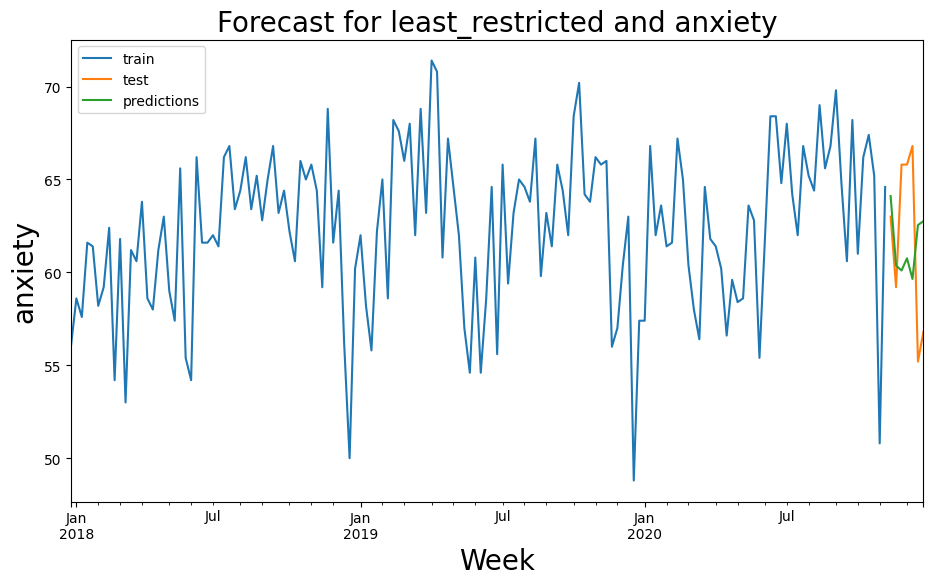

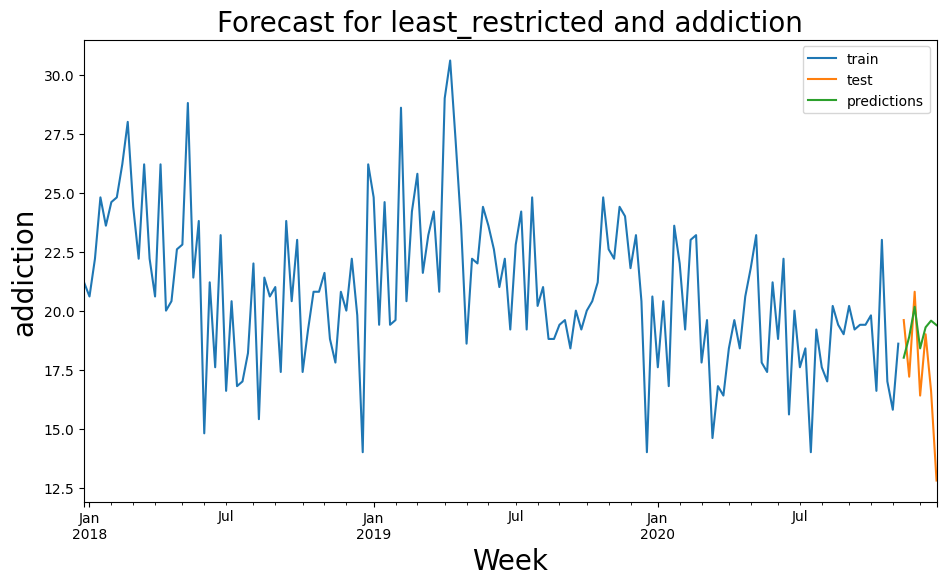

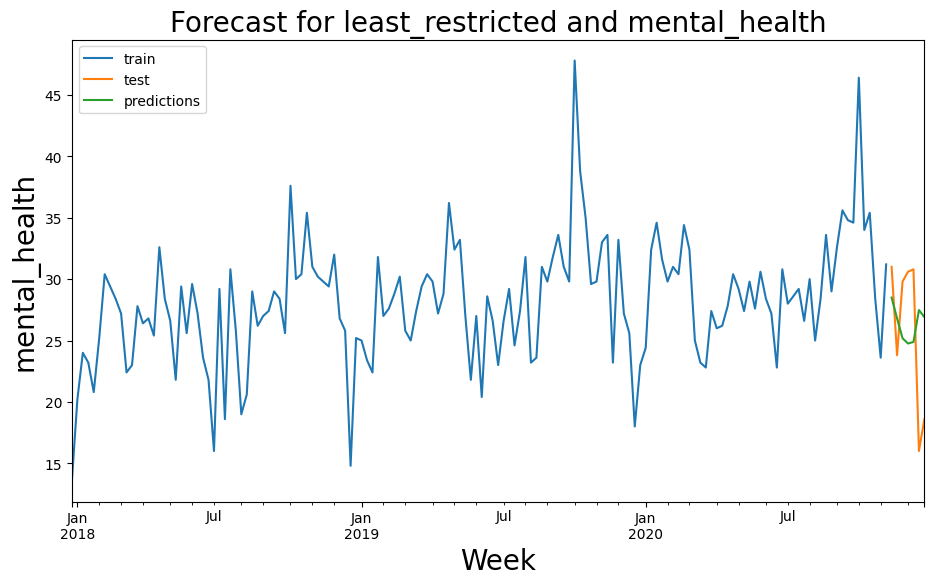

In [10]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
for search in searches_list:
        functions.forecast_file_search_without_exogin(file='least_restricted', period='2021-01-01', steps=7, search=search, regressor=Ridge(), lags=15)

## Covid-19 Restrictions importances for forecasting 

In [11]:
feature_imp_all = feature_imp_most.merge(feature_imp_least, on = 'feature', how='left', suffixes=['_most','_least'])

In [12]:
feature_imp_all.head()

,feature,depression_most,anxiety_most,addiction_most,counselling_most,mental_health_most,depression_least,anxiety_least,addiction_least,counselling_least,mental_health_least
0,stay_at_home,0.265771,-1.447619,0.800116,-1.735489,0.445638,2.289493,-2.112062,0.657421,-0.554495,0.822528
1,mask_mandate,-2.902515,2.100783,-0.678670,2.249770,1.260906,-3.233307,2.707789,-1.340663,0.626111,2.437018
2,gatherings_banned,0.410852,-0.197844,-0.429101,-2.690864,0.420639,-0.897321,1.084915,-0.854495,-3.195805,-0.224129
3,business_closures,0.410852,-0.197844,-0.429101,-2.690864,0.420639,-2.281510,0.419381,-0.155312,-0.987178,-0.249263
4,travel_restrictions,-0.530348,1.248872,-1.542117,-1.421050,0.422055,1.203252,-1.920496,0.713330,-0.851182,1.122429


In [ ]:
# Restriction importances for Depression
plot_resiriction_importances(feature_imp_all, 'depression', ylim=[-0.6, 1.4], time='2021-01-01')

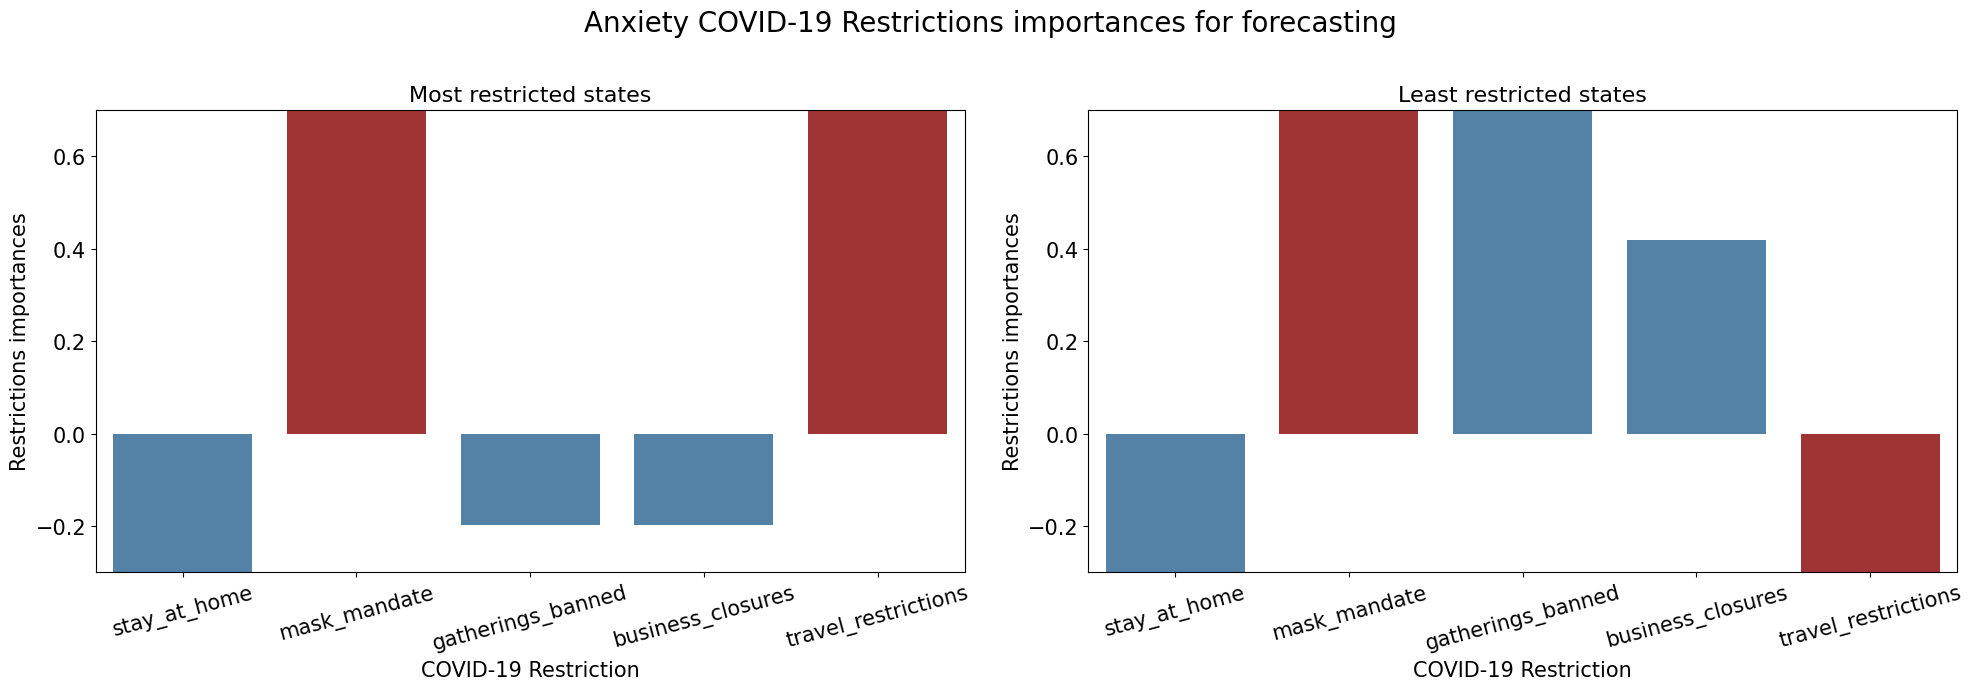

In [13]:
# Restriction importances for Anxiety
functions.plot_resiriction_importances(feature_imp_all, 'anxiety', ylim=[-0.3, 0.7], time='2021-01-01')

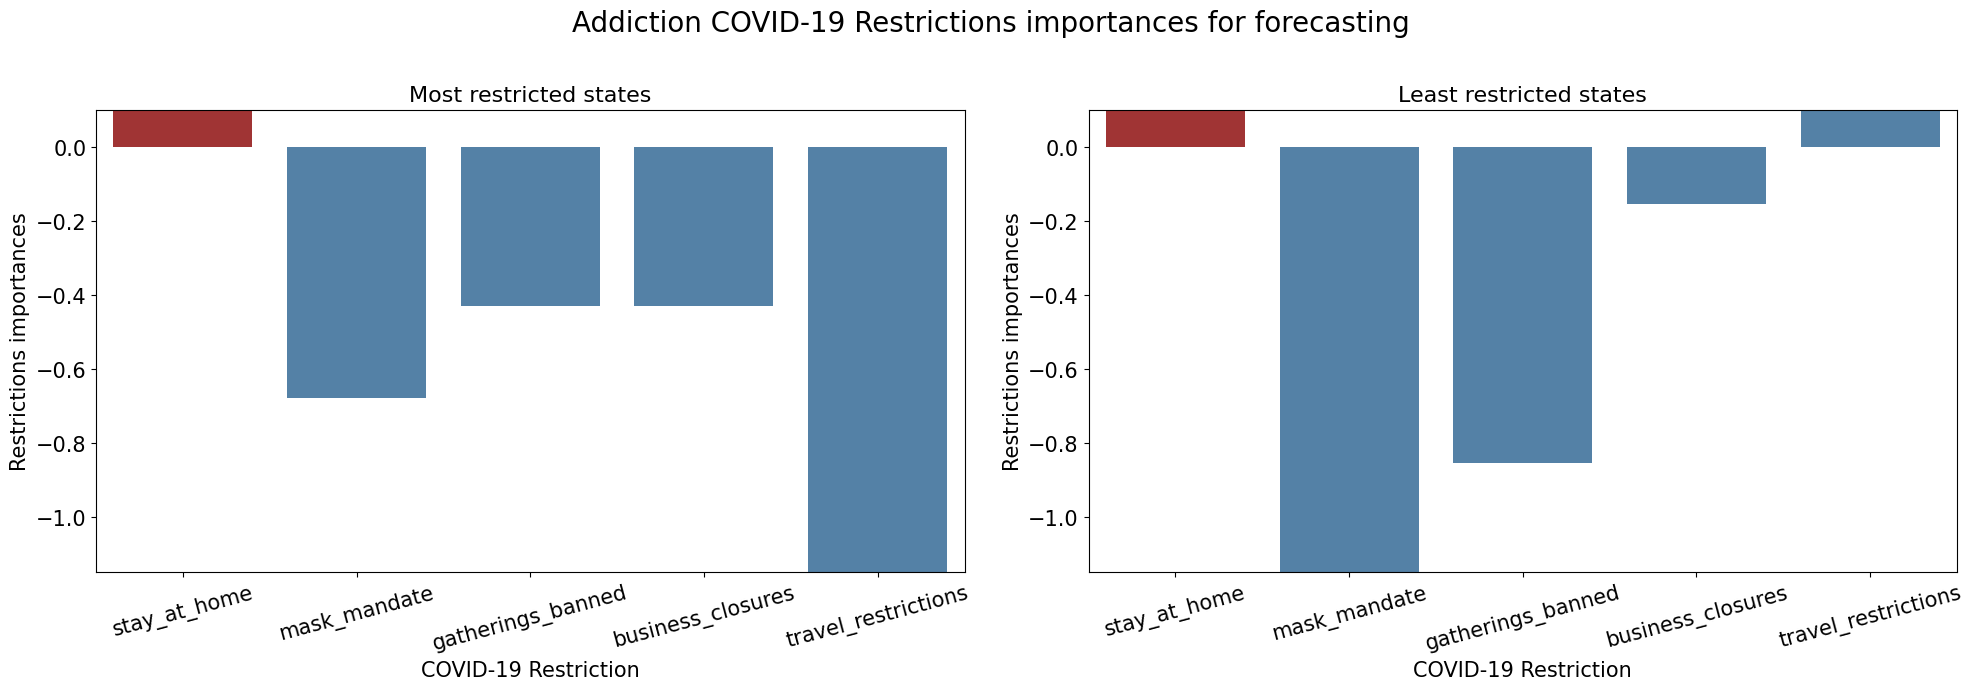

In [15]:
# Restriction importances for Addiction
functions.plot_resiriction_importances(feature_imp_all, 'addiction', ylim=[-1.15, 0.1], time='2021-01-01')

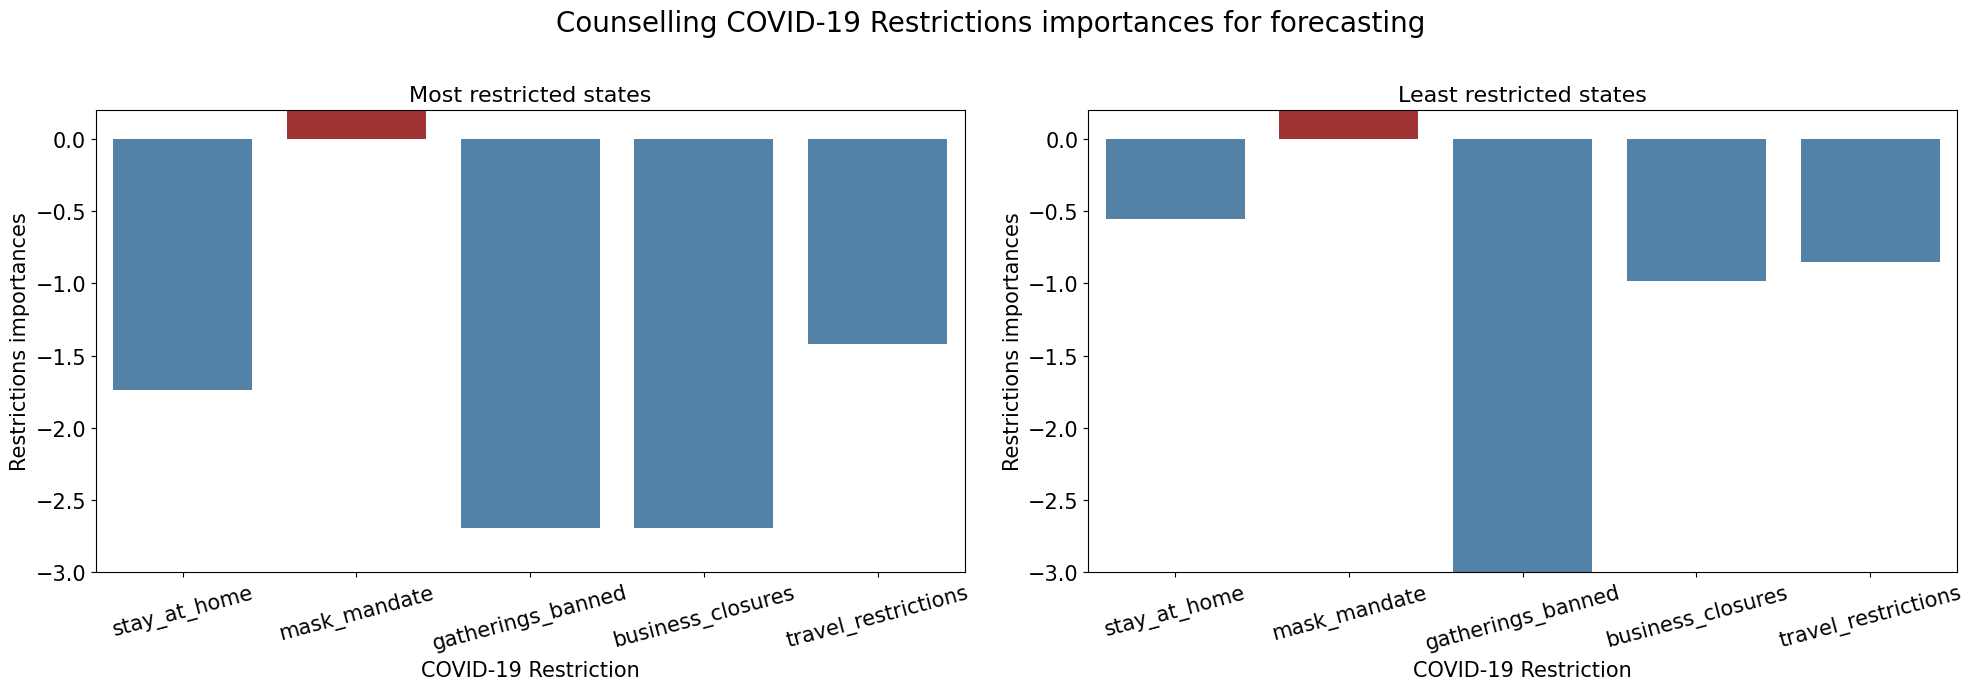

In [16]:
# Restriction importances for Counselling
functions.plot_resiriction_importances(feature_imp_all, 'counselling', ylim=[-3, 0.2], time='2021-01-01')

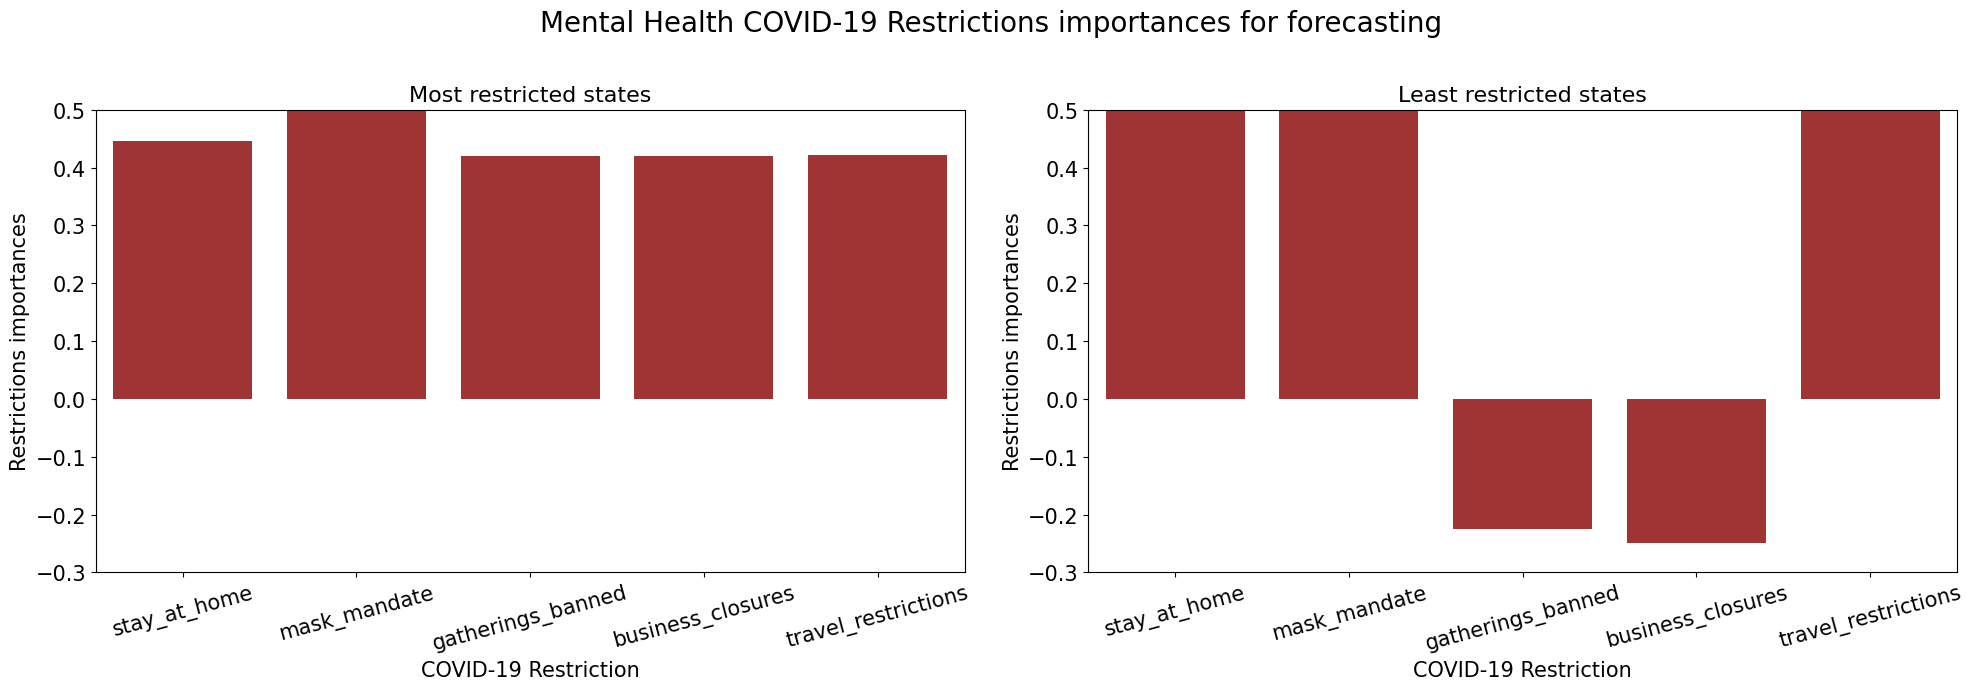

In [17]:
# Restriction importances for Mental Health
functions.plot_resiriction_importances(feature_imp_all, 'mental_health', ylim=[-0.3, 0.5], time='2021-01-01')

# Forecasting with Exoginous Variables for April 2020 for start of COVID-19 pandemic 

Since the ForecasterAutoreg object uses Scikit-learn models, the importance of predictors can be accessed once trained. When the regressor used is a LinearRegression(), Lasso() or Ridge(), the coefficients of the model reflect their importance. In GradientBoostingRegressor() or RandomForestRegressor() regressors, the importance of predictors is based on impurity.

In [2]:

states_list = ['alaska', 'arizona', 'california', 'florida', 'hawaii', 'massachussetts', 'new_york', 'south_dakota', 'texas', 'washington']

for state in states_list:
    for search in searches_list:
        functions.forecast_state_search(state=state, period='2020-05-30', steps=7, search=search, regressor=Ridge(), lags=15, plot = False)


 Forecast for alaska and depression untill 2020-05-30 

Test error (mse): 676.8099202316737 


 Forecast for alaska and anxiety untill 2020-05-30 

Test error (mse): 77.41405668843777 

Feature Importances
                feature  importance
0                 lag_1    0.064900
1                 lag_2    0.145603
2                 lag_3    0.084563
3                 lag_4   -0.015418
4                 lag_5    0.055160
5                 lag_6    0.026088
6                 lag_7   -0.105074
7                 lag_8   -0.023979
8                 lag_9    0.170178
9                lag_10   -0.148702
10               lag_11   -0.114376
11               lag_12   -0.059324
12               lag_13    0.140041
13               lag_14    0.024197
14               lag_15   -0.010498
15         stay_at_home   -3.048882
16         mask_mandate    0.000000
17    gatherings_banned   -3.048882
18    business_closures   -3.048882
19  travel_restrictions   -0.084384

 Forecast for alaska and addiction u

## Closer look at best predicting models


 Forecast for alaska and anxiety untill 2020-05-30 

Test error (mse): 77.41405668843777 

Feature Importances
                feature  importance
0                 lag_1    0.064900
1                 lag_2    0.145603
2                 lag_3    0.084563
3                 lag_4   -0.015418
4                 lag_5    0.055160
5                 lag_6    0.026088
6                 lag_7   -0.105074
7                 lag_8   -0.023979
8                 lag_9    0.170178
9                lag_10   -0.148702
10               lag_11   -0.114376
11               lag_12   -0.059324
12               lag_13    0.140041
13               lag_14    0.024197
14               lag_15   -0.010498
15         stay_at_home   -3.048882
16         mask_mandate    0.000000
17    gatherings_banned   -3.048882
18    business_closures   -3.048882
19  travel_restrictions   -0.084384


ForecasterAutoreg 
Regressor: Ridge() 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Transformer for y: None 
Transformer for exog: None 
Window size: 15 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['stay_at_home', 'mask_mandate', 'gatherings_banned', 'business_closures', 'travel_restrictions'] 
Training range: [Timestamp('2017-12-31 00:00:00'), Timestamp('2020-04-05 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: W-SUN 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001} 
Creation date: 2023-01-29 10:55:24 
Last fit date: 2023-01-29 10:55:24 
Skforecast version: 0.6.0 
Python version: 3.7.16 

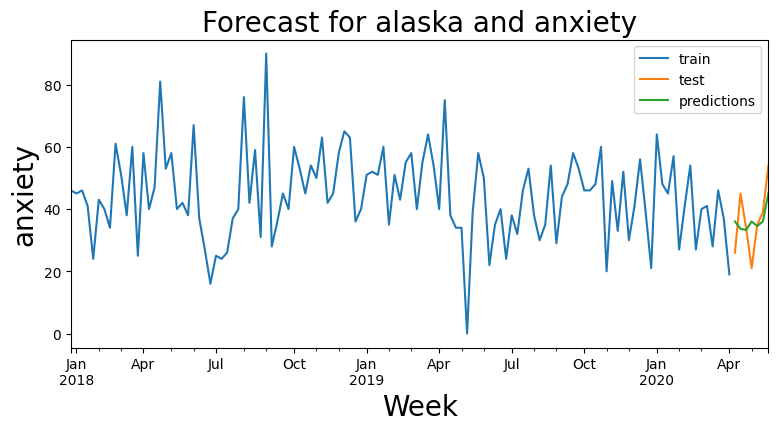

In [4]:
functions.forecast_state_search(state='alaska', period='2020-05-30', steps=7, search='anxiety', regressor=Ridge(), lags=15)


 Forecast for alaska and addiction untill 2020-05-30 

Test error (mse): 67.26044167980055 

Feature Importances
                feature  importance
0                 lag_1    0.004321
1                 lag_2   -0.224225
2                 lag_3   -0.051636
3                 lag_4   -0.134785
4                 lag_5   -0.033527
5                 lag_6   -0.199931
6                 lag_7    0.018431
7                 lag_8    0.109594
8                 lag_9   -0.118110
9                lag_10   -0.182569
10               lag_11   -0.029143
11               lag_12    0.087788
12               lag_13   -0.136758
13               lag_14    0.146707
14               lag_15   -0.088808
15         stay_at_home   -3.239299
16         mask_mandate    0.000000
17    gatherings_banned   -3.239299
18    business_closures   -3.239299
19  travel_restrictions   -1.822186


ForecasterAutoreg 
Regressor: Ridge() 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Transformer for y: None 
Transformer for exog: None 
Window size: 15 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['stay_at_home', 'mask_mandate', 'gatherings_banned', 'business_closures', 'travel_restrictions'] 
Training range: [Timestamp('2017-12-31 00:00:00'), Timestamp('2020-04-05 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: W-SUN 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001} 
Creation date: 2023-01-29 10:56:30 
Last fit date: 2023-01-29 10:56:30 
Skforecast version: 0.6.0 
Python version: 3.7.16 

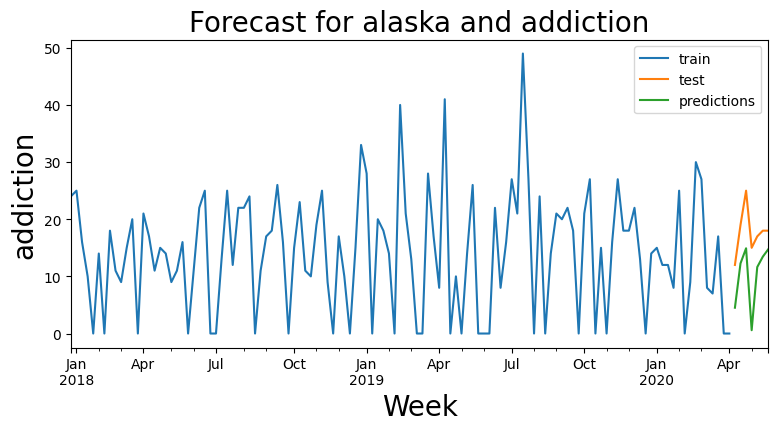

In [5]:
functions.forecast_state_search(state='alaska', period='2020-05-30', steps=7, search='addiction', regressor=Ridge(), lags=15)


 Forecast for alaska and mental_health untill 2020-05-30 

Test error (mse): 68.00157600452621 

Feature Importances
                feature  importance
0                 lag_1    0.067226
1                 lag_2    0.077393
2                 lag_3   -0.032284
3                 lag_4   -0.146271
4                 lag_5    0.095530
5                 lag_6   -0.004630
6                 lag_7    0.089062
7                 lag_8   -0.187314
8                 lag_9    0.013144
9                lag_10   -0.002634
10               lag_11    0.056368
11               lag_12   -0.040882
12               lag_13   -0.095883
13               lag_14    0.145211
14               lag_15    0.151381
15         stay_at_home    2.273357
16         mask_mandate    0.000000
17    gatherings_banned    2.273357
18    business_closures    2.273357
19  travel_restrictions   -7.965712


ForecasterAutoreg 
Regressor: Ridge() 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
Transformer for y: None 
Transformer for exog: None 
Window size: 15 
Weight function included: False 
Exogenous included: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['stay_at_home', 'mask_mandate', 'gatherings_banned', 'business_closures', 'travel_restrictions'] 
Training range: [Timestamp('2017-12-31 00:00:00'), Timestamp('2020-04-05 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: W-SUN 
Regressor parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001} 
Creation date: 2023-01-29 10:56:54 
Last fit date: 2023-01-29 10:56:54 
Skforecast version: 0.6.0 
Python version: 3.7.16 

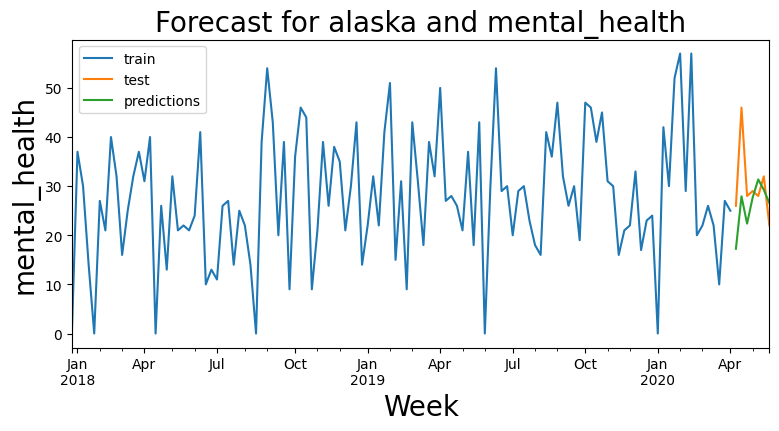

In [6]:
functions.forecast_state_search(state='alaska', period='2020-05-30', steps=7, search='mental_health', regressor=Ridge(), lags=15)

In [ ]:
functions.forecast_state_search(state='alaska', period='2020-05-30', steps=7, search='addiction', regressor=Ridge(), lags=15)

In [ ]:
functions.forecast_state_search(state='alaska', period='2020-05-30', steps=7, search='addiction', regressor=Ridge(), lags=15)

In [ ]:
functions.forecast_state_search(state='alaska', period='2020-05-30', steps=7, search='addiction', regressor=Ridge(), lags=15)

In [ ]:
functions.forecast_state_search(state='alaska', period='2020-05-30', steps=7, search='addiction', regressor=Ridge(), lags=15)

In [ ]:
functions.forecast_state_search(state='alaska', period='2020-05-30', steps=7, search='addiction', regressor=Ridge(), lags=15)

In [ ]:
functions.forecast_state_search(state='alaska', period='2020-05-30', steps=7, search='addiction', regressor=Ridge(), lags=15)